## About the  Dataset

 This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

## Content

Loan_id A unique loan number assigned to each loan customers

Loan_status Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

Principal Basic principal loan amount at the origination

terms Can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date When the loan got originated and took effects

Due_date Since it’s one-time payoff schedule, each loan has one single due date

Paid_off_time The actual time a customer pays off the loan

Past_due_days How many days a loan has been past due

Age, education, gender A customer’s basic demographic information

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [69]:
df = pd.read_csv('Loan payments data.csv')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [70]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'])
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female


In [71]:
df['past_due_days'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [72]:
df.fillna(0,inplace=True)

In [73]:
pd.crosstab(df.loan_status,[df.education,df.Gender],normalize=True)*100

education          Bechalor      High School or Below       Master or Above  \
Gender               female male               female  male            male   
loan_status                                                                   
COLLECTION              0.0  2.2                  1.4   8.4             0.2   
COLLECTION_PAIDOFF      0.2  2.8                  1.0   6.4             0.0   
PAIDOFF                 2.4  5.8                  3.8  20.8             0.6   

education          college        
Gender              female  male  
loan_status                       
COLLECTION             0.6   7.2  
COLLECTION_PAIDOFF     1.6   8.0  
PAIDOFF                4.4  22.2

### Imbalanced Data: data generation 

In [75]:
df.loan_status = df.loan_status.replace(to_replace=['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'],value=[1,0,1])
df.loan_status.value_counts()

1    400
0    100
Name: loan_status, dtype: int64

In [83]:
target = df.loan_status
predictor = pd.get_dummies(df.drop(['Loan_ID','loan_status'],axis=1),drop_first=True)

X_train, X_test, y_train,y_test = train_test_split(predictor,target,test_size=0.2)
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sm))

Original dataset shape Counter({1: 324, 0: 76})
Resampled dataset shape Counter({1: 324, 0: 324})


### Naive Bayes classification

In [84]:

naive_model = MultinomialNB(alpha = 0.01, fit_prior = True)
naive_model.fit(X_train_sm,y_train_sm)


MultinomialNB(alpha=0.01)

### Discriminant Analysis

In [85]:

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_sm,y_train_sm)
pd.DataFrame(lda_model.scalings_ ,index = X_train_sm.columns)

,0
Principal,-0.005038
terms,-0.197665
past_due_days,-0.293149
age,0.024652
effective_date_9/11/2016,0.144671
...,...
paid_off_time_9/9/2016 13:45,-2.045494
education_High School or Below,-0.002003
education_Master or Above,-2.422814
education_college,-0.072412


### Logistic Regression

In [87]:
logReg_model = LogisticRegression(penalty = 'l2', solver='liblinear')
logReg_model.fit(X_train_sm,y_train_sm)

LogisticRegression(solver='liblinear')

### Evaluating the classification models

In [119]:
y_hat_log = logReg_model.predict(X_test)
conf_log = pd.DataFrame(confusion_matrix(y_test,y_hat_log),index=['Collection','Paidoff or collection-paidoff'],columns=['Collection','Paidoff or collection-paidoff'])
y_hat_DA = logReg_model.predict(X_test)
conf_DA = pd.DataFrame(confusion_matrix(y_test,y_hat_DA),index=['Collection','Paidoff or collection-paidoff'],columns=['Collection','Paidoff or collection-paidoff'])
y_hat_NB = logReg_model.predict(X_test)
conf_NB = pd.DataFrame(confusion_matrix(y_test,y_hat_NB),index=['Collection','Paidoff or collection-paidoff'],columns=['Collection','Paidoff or collection-paidoff'])

print(conf_log)
print(conf_DA)
print(conf_NB)




                               Collection  Paidoff or collection-paidoff
Collection                             24                              0
Paidoff or collection-paidoff           2                             74
                               Collection  Paidoff or collection-paidoff
Collection                             24                              0
Paidoff or collection-paidoff           2                             74
                               Collection  Paidoff or collection-paidoff
Collection                             24                              0
Paidoff or collection-paidoff           2                             74


In [102]:
accuracy_score(y_test,y_hat)

0.98

Text(0, 0.5, 'recall')

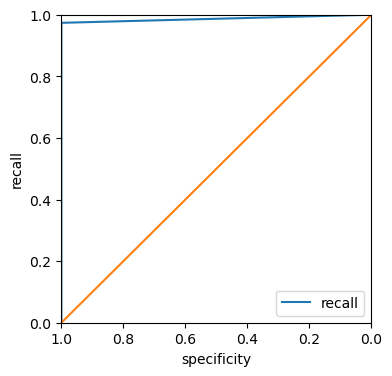

In [112]:
fpr, tpr, thresholds = roc_curve(target,y_hat_NB)
roc_df = pd.DataFrame({'recall':tpr , 'specificity': 1-fpr})
ax= roc_df.plot(x='specificity',y='recall',figsize=(4,4))
ax.set_ylim(0,1)
ax.set_xlim(1,0)
ax.plot((1,0),(0,1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')

                               Collection  Paidoff or collection-paidoff
Collection                             99                              1
Paidoff or collection-paidoff           5                            395
0.988


Text(0, 0.5, 'recall')

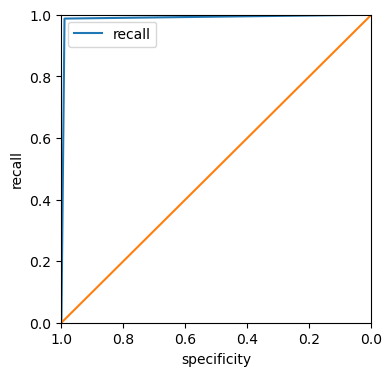

In [118]:
y_hat_log = logReg_model.predict(predictor)
conf_log = pd.DataFrame(confusion_matrix(target,y_hat_log),index=['Collection','Paidoff or collection-paidoff'],columns=['Collection','Paidoff or collection-paidoff'])
print(conf_log)
print(accuracy_score(target,y_hat_log))
fpr, tpr, thresholds = roc_curve(target,y_hat_log)
roc_df = pd.DataFrame({'recall':tpr , 'specificity': 1-fpr})
ax= roc_df.plot(x='specificity',y='recall',figsize=(4,4))
ax.set_ylim(0,1)
ax.set_xlim(1,0)
ax.plot((1,0),(0,1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')